In [36]:
import tensorflow as tf
from tensorflow.keras import layers , datasets , models
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import adam
from keras.layers import Conv2D , MaxPooling2D

In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [11]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [54]:
y_test = y_test.reshape(-1,)

In [55]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [14]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck", "human"]

In [15]:
classes

['aeroplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck',
 'human']

In [16]:
def sample_plot(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

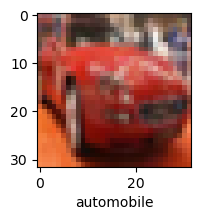

In [17]:
sample_plot(X_train , y_train , 5)

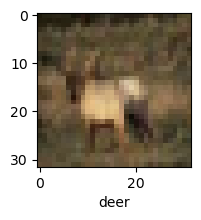

In [18]:
sample_plot(X_train , y_train , 3)

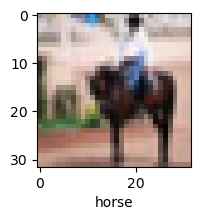

In [19]:
sample_plot(X_train , y_train , 11)

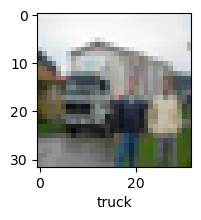

In [20]:
sample_plot(X_train , y_train , 16)

In [21]:
from keras.models import Sequential
from keras.layers import MaxPooling2D , Dense ,Flatten

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
ann = Sequential()
ann.add(Flatten(input_shape = (32,32,3)))
ann.add(Dense(3000, activation = "relu"))
ann.add(Dense(1000 , activation = "relu"))
ann.add(Dense(10 , activation = "softmax"))
        

In [24]:
ann.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [25]:
ann.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 220s 140ms/step - loss: 1.9113 - accuracy: 0.3230
Epoch 2/5
1563/1563 [==============================] - 218s 140ms/step - loss: 1.6725 - accuracy: 0.3991
Epoch 3/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.5920 - accuracy: 0.4293
Epoch 4/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.5409 - accuracy: 0.4497
Epoch 5/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.5064 - accuracy: 0.4595


In [26]:
from sklearn.metrics import classification_report
import numpy as np

In [27]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 5s 15ms/step


In [28]:
y_pred_class = [np.argmax(element) for element in y_pred]

In [29]:
print("classification_report: \n",classification_report(y_test , y_pred_class))

classification_report: 
               precision    recall  f1-score   support

           0       0.49      0.54      0.51      1000
           1       0.61      0.52      0.56      1000
           2       0.33      0.37      0.34      1000
           3       0.35      0.34      0.34      1000
           4       0.36      0.40      0.38      1000
           5       0.49      0.23      0.32      1000
           6       0.53      0.49      0.51      1000
           7       0.52      0.49      0.50      1000
           8       0.60      0.55      0.57      1000
           9       0.42      0.67      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



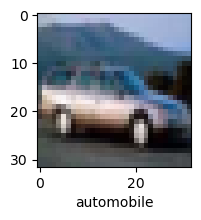

In [32]:
sample_plot(X_train  , y_train , 4)

In [41]:
cnn =  Sequential()
cnn.add(Conv2D(filters = 32 ,kernel_size = (3,3), input_shape = (32,32,3) , activation = "relu"))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Conv2D(filters = 64  , kernel_size = (3,3) , activation  = "relu"))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten(input_shape = (32,32,3)))
cnn.add(Dense(64 , activation = "relu"))
cnn.add(Dense(10 , activation = "softmax"))
        

In [43]:
cnn.compile(loss = "sparse_categorical_crossentropy" , optimizer  = "adam"  , metrics = ['accuracy'])

In [44]:
cnn.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4688 - accuracy: 0.4719
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1176 - accuracy: 0.6066
Epoch 3/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9902 - accuracy: 0.6540
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9032 - accuracy: 0.6853
Epoch 5/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8395 - accuracy: 0.7078


In [45]:
Y_pred = cnn.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [50]:
Y_pred_class = [np.argmax(element) for element in Y_pred]

In [51]:
print("classification_report:\n",classification_report(y_test , Y_pred_class))

classification_report:
               precision    recall  f1-score   support

           0       0.82      0.62      0.71      1000
           1       0.72      0.84      0.77      1000
           2       0.71      0.40      0.51      1000
           3       0.54      0.42      0.48      1000
           4       0.51      0.77      0.61      1000
           5       0.56      0.62      0.59      1000
           6       0.65      0.84      0.74      1000
           7       0.76      0.73      0.74      1000
           8       0.82      0.75      0.78      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



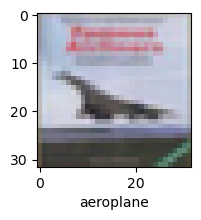

In [56]:
sample_plot(X_test , y_test , 3)

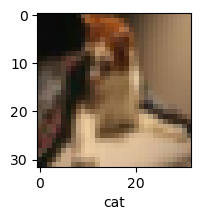

In [58]:
sample_plot(X_test ,y_test , 61)